# Simple Boggle Portfolio Analysis Vs market:  

Domestic Stocks (55%):  

* Vanguard Total Stock Market ETF (VTI): 20% (Covers all sectors)
* Vanguard S&P 500 ETF (VOO): 15%
* Vanguard Mega Cap ETF (MGC): 10%
* Vanguard Small-Cap Growth ETF (VBK): 10% (For exposure to growth small-cap companies)

International Stocks (15%):  

* Vanguard Total International Stock ETF (VXUS): 4%
* Vanguard FTSE All-World ex-US ETF (VEU): 4%
* Vanguard FTSE Emerging Markets ETF (VWO): 4%
* Vanguard FTSE Developed Markets ETF (VEA): 3%

Bonds (20%):  

* Vanguard Total Bond Market ETF (BND): 8%
* Vanguard Intermediate-Term Corporate Bond ETF (VCIT): 7%
* Vanguard Short-Term Corporate Bond ETF (VCSH): 3%
* Vanguard Long-Term Bond ETF (BLV): 2%

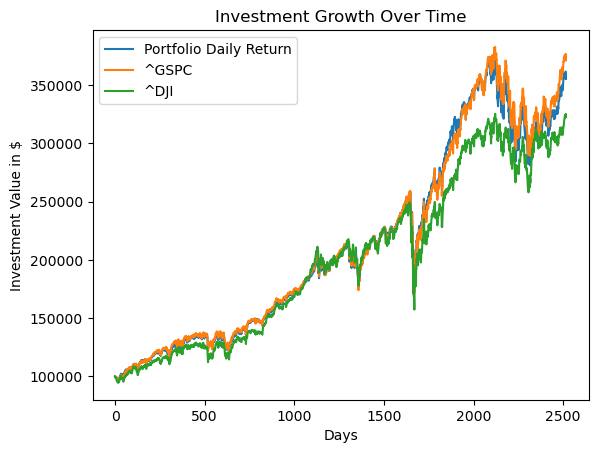

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the portfolio and the stocks for comparison
portfolio_1 = {
    'VTI': 0.2,
    'VOO': 0.15,
    'MGC': 0.1,
    'VBK': 0.1,
    'VXUS': 0.04,
    'VEU': 0.04,
    'VWO': 0.04,
    'VEA': 0.03,
    'BND': 0.08,
    'VCIT': 0.07,
    'VCSH': 0.03,
    'BLV': 0.02,
}

stocks = {
    '^GSPC': 1, # S&P 500 Index
    '^DJI': 1   # Dow Jones Industrial Average
}

period = "10y"
Initial_Investment=100000
Monthly_Investment=500

# Fetch data for portfolio
portfolio_data = pd.DataFrame()
for stock, weight in portfolio_1.items():
    ticker_data = yf.Ticker(stock).history(period=period)['Close']
    portfolio_data[stock] = ticker_data * weight

# Fetch data for market indices
market_data = pd.DataFrame()
for stock in stocks:
    ticker_data = yf.Ticker(stock).history(period=period)['Close']
    market_data[stock] = ticker_data

# Calculate daily return for portfolio
portfolio_data['Portfolio Daily Return'] = portfolio_data.sum(axis=1).pct_change()

# Calculate daily return for market indices
market_data = market_data.pct_change()

# Combine the portfolio with market data
combined_data = pd.concat([portfolio_data['Portfolio Daily Return'], market_data], axis=1).dropna()

# Function to compute cumulative returns
def compute_investment(daily_returns, initial_investment=Initial_Investment, monthly_investment=Monthly_Investment):
    investment = [initial_investment]
    for i, daily_return in enumerate(daily_returns):
        # Apply monthly investment
        if (i + 1) % 20 == 0:
            investment[-1] += monthly_investment
        # Compute new investment value
        investment.append(investment[-1] * (1 + daily_return))
    return investment

# Compute cumulative investment for portfolio and market indices
investment_values = {col: compute_investment(combined_data[col]) for col in combined_data.columns}

# Plot the investment growth
for label, values in investment_values.items():
    plt.plot(values, label=label)
plt.legend()
plt.title("Investment Growth Over Time")
plt.xlabel("Days")
plt.ylabel("Investment Value in $")
plt.show()
